In [42]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.io.votable import parse
from scipy import stats
import seaborn as sns
import scipy.optimize as fit
from astropy.table import Table
import math

In [43]:
gaia_fit = fits.open('gaia4_8_15-result.fits')
gaiatable = gaia_fit[1].data

temp = gaiatable['teff_gspphot']
lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)

<function matplotlib.pyplot.show(close=None, block=None)>

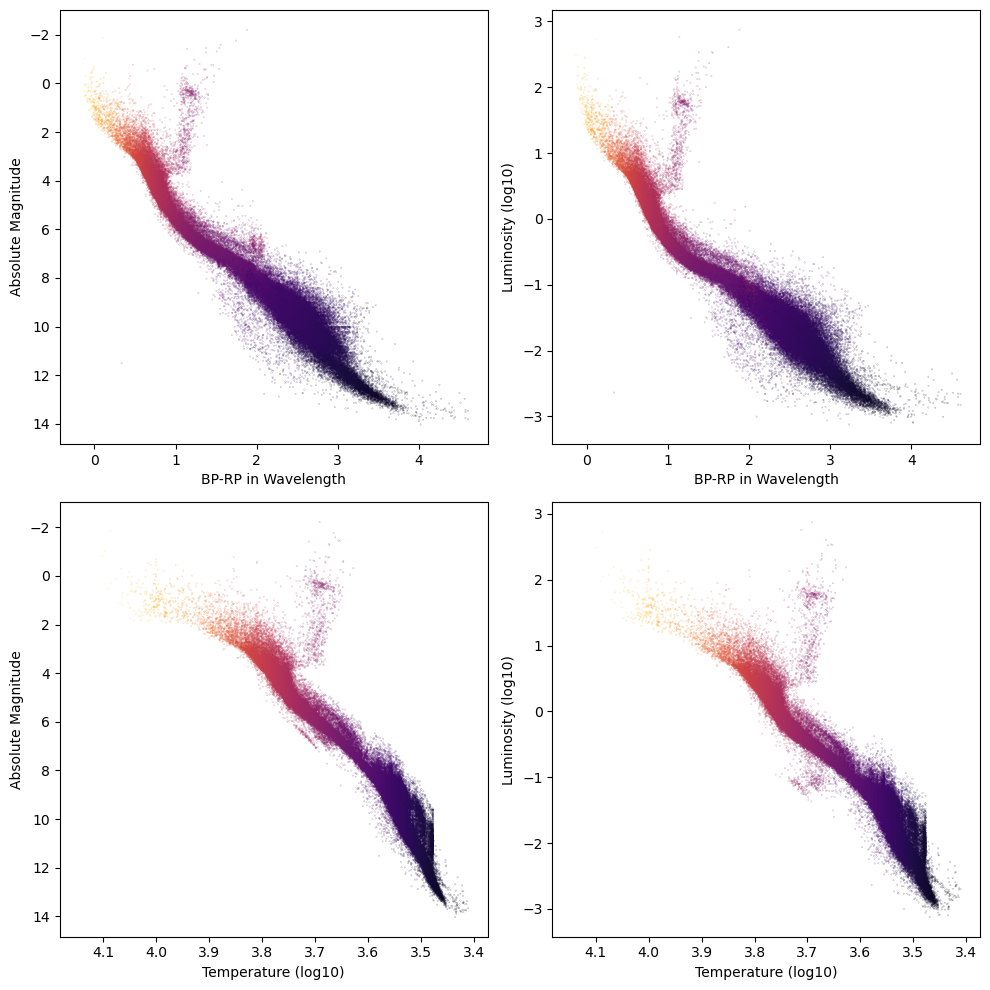

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(10,10))

axs[0,0].scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs[0,0].set_xlabel('BP-RP in Wavelength')
axs[0,0].set_ylabel('Absolute Magnitude')
axs[0,0].invert_yaxis()

axs[0,1].scatter(bprp, np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[0,1].set_xlabel('BP-RP in Wavelength')
axs[0,1].set_ylabel('Luminosity (log10)')

axs[1,0].scatter(np.log10(temp), absmag, c=color, cmap='inferno', s=0.01)
axs[1,0].set_xlabel('Temperature (log10)')
axs[1,0].set_ylabel('Absolute Magnitude')
axs[1,0].invert_xaxis()
axs[1,0].invert_yaxis()

axs[1,1].scatter(np.log10(temp), np.log10(lum), c=color, cmap='inferno', s=0.01)
axs[1,1].set_xlabel('Temperature (log10)')
axs[1,1].set_ylabel('Luminosity (log10)')
axs[1,1].invert_xaxis()

plt.tight_layout()
plt.show

In [4]:
gaia_fit_dwarfs = fits.open('gaia4_24_1-result.fits')
gaiatable_dwarfs = gaia_fit_dwarfs[1].data

temp_d = gaiatable_dwarfs['teff_gspphot']
bprp_d = gaiatable_dwarfs['bp_rp']
absmag_d = gaiatable_dwarfs['g_mag_abs']
color_d = np.log10(temp_d)

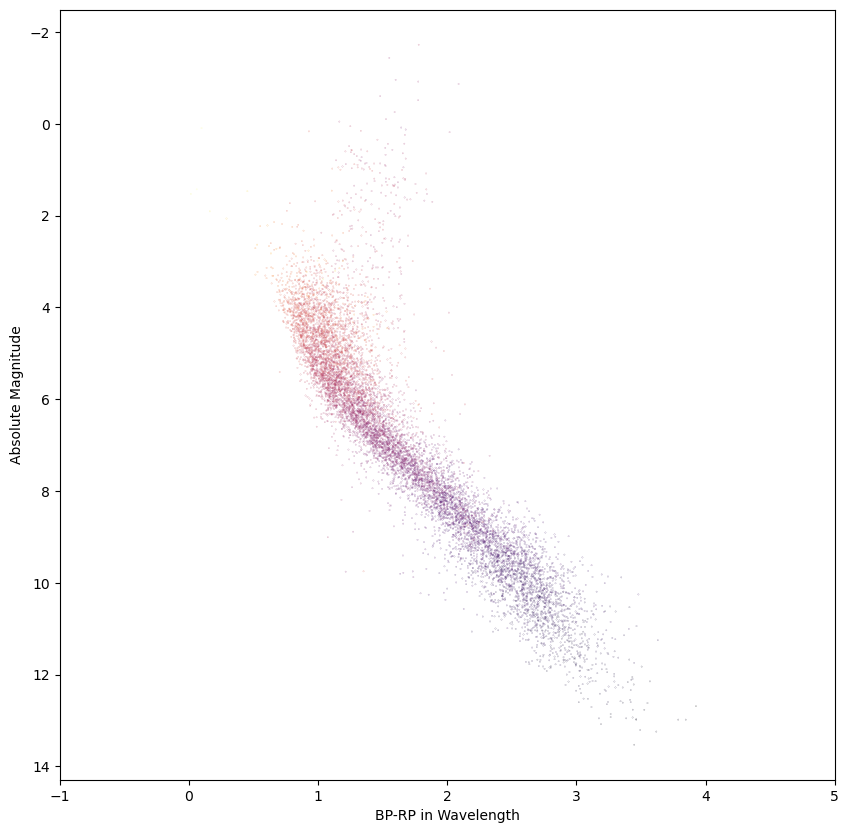

In [5]:
fig, axs = plt.subplots(figsize=(10,10))

axs.scatter(bprp_d, absmag_d, c=color_d, cmap='inferno', s=0.01)
axs.set_xlim(-1, 5)
axs.set_xlabel('BP-RP in Wavelength')
axs.set_ylabel('Absolute Magnitude')
axs.invert_yaxis()

Text(0, 0.5, 'Temperature')

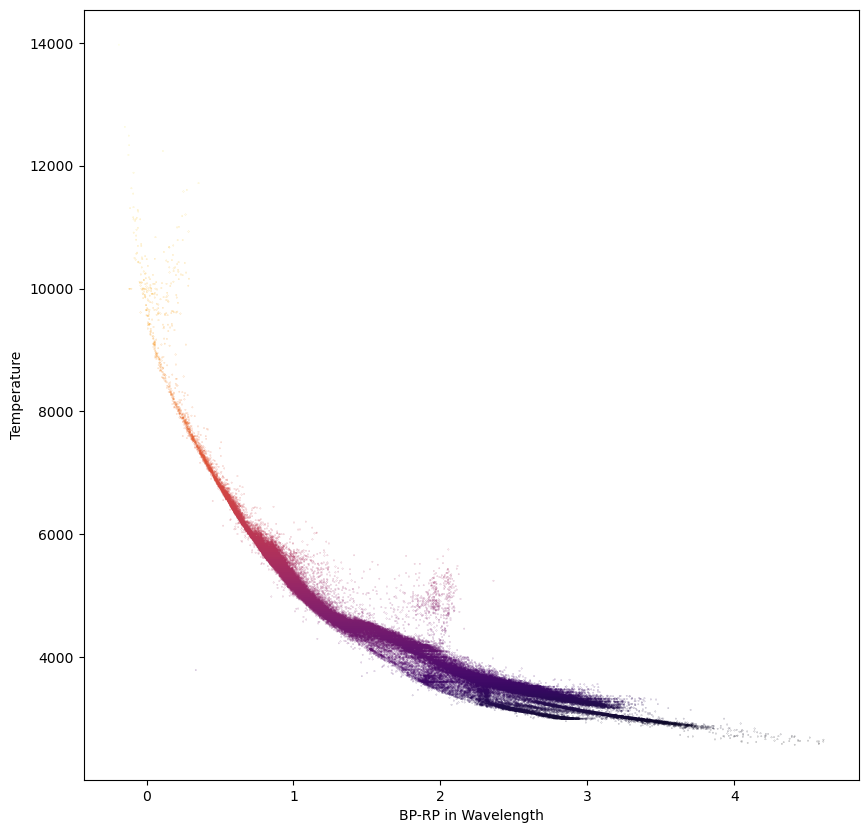

In [6]:
fig, axs = plt.subplots(figsize=(10,10))

axs.scatter(bprp, temp, c=color, cmap='inferno', s=0.01)
axs.set_xlabel('BP-RP in Wavelength')
axs.set_ylabel('Temperature')

In [7]:
gaia = Table.read('gaia4_8_15-result.fits', format='fits')
df = gaia.to_pandas()

In [8]:
df

,teff_gspphot,lum_flame,random_index,bp_rp,distance_gspphot,mg_gspphot
0,2829.354248,0.001522,1320081859,3.804580,1.301100,13.3372
1,3099.633545,0.003398,1329945144,2.833697,1.827500,11.8014
2,3511.044922,0.023885,970765473,2.215609,2.545300,9.5030
3,3117.375977,0.004220,249919922,2.834036,2.976200,11.6784
4,5002.043457,0.339707,564182683,1.140298,3.217900,5.9203
...,...,...,...,...,...,...
109323,5454.858887,2.170328,1621933212,0.923433,99.998398,3.8573
109324,3190.884033,0.005147,1338395813,3.091102,99.999001,11.3643
109325,3398.098145,0.015128,690139787,2.729296,99.999100,10.0537
109326,3806.747070,0.056756,773149836,2.124908,99.999802,8.4094


In [9]:
gaia = Table.read('gaia4_8_15-result.fits', format='fits')
df = gaia.to_pandas()

temp = df['teff_gspphot']
lum = df['lum_flame']
bprp = df['bp_rp']
absmag = df['mg_gspphot']

tempstd = temp.expanding().std()

df['tempstd'] = tempstd
df

,teff_gspphot,lum_flame,random_index,bp_rp,distance_gspphot,mg_gspphot,tempstd
0,2829.354248,0.001522,1320081859,3.804580,1.301100,13.3372,NaN
1,3099.633545,0.003398,1329945144,2.833697,1.827500,11.8014,191.116324
2,3511.044922,0.023885,970765473,2.215609,2.545300,9.5030,343.271611
3,3117.375977,0.004220,249919922,2.834036,2.976200,11.6784,280.662749
4,5002.043457,0.339707,564182683,1.140298,3.217900,5.9203,867.757137
...,...,...,...,...,...,...,...
109323,5454.858887,2.170328,1621933212,0.923433,99.998398,3.8573,1088.946944
109324,3190.884033,0.005147,1338395813,3.091102,99.999001,11.3643,1088.947115
109325,3398.098145,0.015128,690139787,2.729296,99.999100,10.0537,1088.945538
109326,3806.747070,0.056756,773149836,2.124908,99.999802,8.4094,1088.941573


In [10]:
# # Extracting the data from the dataframe
# x_data = df['bp_rp']
# y_data = df['teff_gspphot']

# # Define the exponential decay function
# def exponential_decay(x, a, b, c):
#     return a * np.exp(-b * x) + c

# popt, pcov = curve_fit(exponential_decay, x_data, y_data)

# x_fit = np.linspace(min(x_data), max(x_data), 100)
# y_fit = exponential_decay(x_fit, *popt)

# plt.figure(figsize=(10, 10))
# plt.scatter(x_data, y_data, label='Data', s=0.01, c='b')
# plt.plot(x_fit, y_fit, 'r-', label='Best Fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))
# plt.xlabel('bp_rp')
# plt.ylabel('teff_gspphot')
# plt.legend()
# plt.title('Exponential Decay Fit')
# plt.grid(True)
# plt.show()


In [11]:
df = df.sort_values(by=['bp_rp'])

Text(0.5, 1.0, 'BP-RP vs Temp Fitted Exponential')

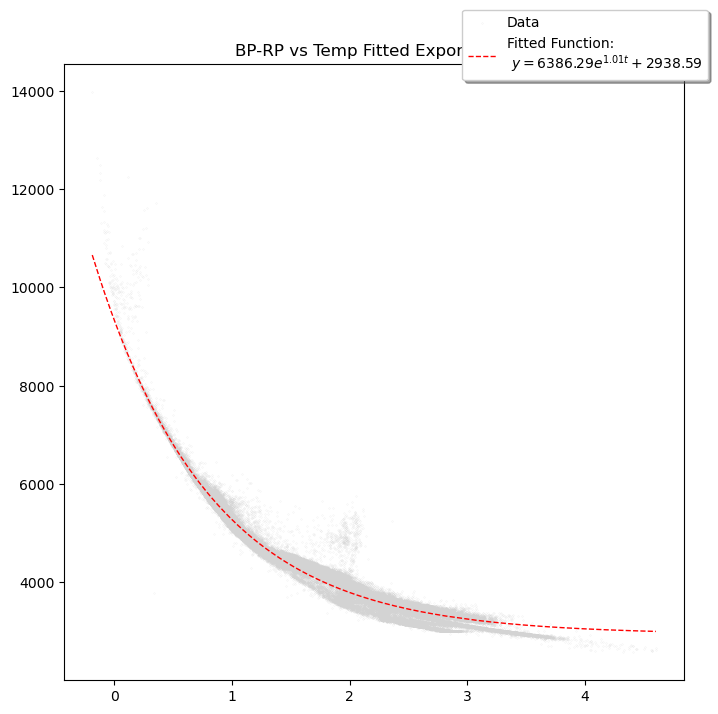

In [41]:
x = np.array(df['bp_rp'])
y = np.array(df['teff_gspphot'])

def expfit(x, a, b, c):
    return a * np.exp(-b * x) + c

# perform the fit
p0 = [100, 1, 2000]
params, cv = fit.curve_fit(expfit, x, y, p0)
a, b, c = params

# plot the results
fig, axs = plt.subplots(figsize=(8,8))
axs.scatter(x, y, s=0.01, label='Data', c='lightgrey')
axs.plot(x, expfit(x, a, b, c), 'r--', lw=1, label='Fitted Function:\n $y = %0.2f e^{%0.2f t} + %0.2f$' % (a, b, c))
axs.legend(bbox_to_anchor=(1.05, 1.1), fancybox=True, shadow=True, loc=0)
axs.set_title("BP-RP vs Temp Fitted Exponential")

<function matplotlib.pyplot.show(close=None, block=None)>

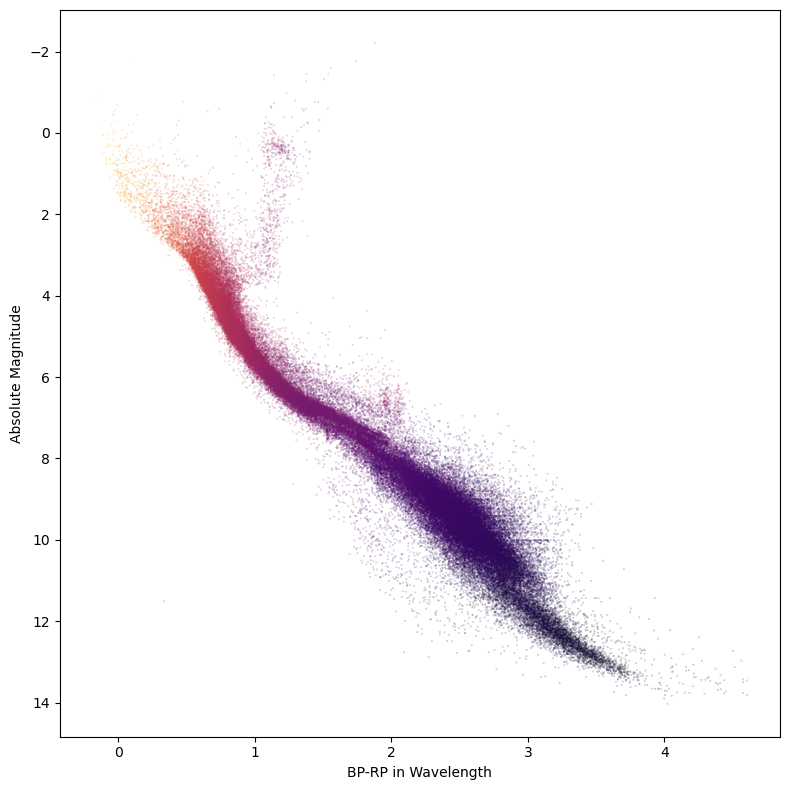

In [39]:
gaia_fit = fits.open('gaia4_8_15-result.fits')
gaiatable = gaia_fit[1].data

temp = gaiatable['teff_gspphot']
lum = gaiatable['lum_flame']
bprp = gaiatable['bp_rp']
absmag = gaiatable['mg_gspphot']
color = np.log10(temp)

fig, axs = plt.subplots(figsize=(8,8))

axs.scatter(bprp, absmag, c=color, cmap='inferno', s=0.01)
axs.set_xlabel('BP-RP in Wavelength')
axs.set_ylabel('Absolute Magnitude')
axs.invert_yaxis()

plt.tight_layout()
plt.show